# Practical -6

## Name : Ashlesha Bhandarkar
## Roll No. : D1-03

### Aim: Create a machine learning model to predict whether a person survived in Titanic or not.
### 1 Perform the EDA
### 2 Apply Naive Bayes classifier 
### 3 Apply SVM
### 4 Apply RF
### 5 Evaluate the performance using Precision, Recall, F1 score and accuracy.
### 6 Apply hyper parameter tuning to improve performance.



In [6]:
import pandas as pd
import numpy as np

df= pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
df.shape

(891, 12)

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
## for printing columns

for col in df.columns:
    print(col)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [11]:
df1=df.drop(['Parch','SibSp','Ticket','Embarked','PassengerId','Name'],axis=1)

In [12]:
df1

,Survived,Pclass,Sex,Age,Fare,Cabin
0,0,3,male,22.0,7.2500,NaN
1,1,1,female,38.0,71.2833,C85
2,1,3,female,26.0,7.9250,NaN
3,1,1,female,35.0,53.1000,C123
4,0,3,male,35.0,8.0500,NaN
...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,NaN
887,1,1,female,19.0,30.0000,B42
888,0,3,female,NaN,23.4500,NaN
889,1,1,male,26.0,30.0000,C148


In [13]:
df1=df1.drop(['Cabin'],axis=1)

In [14]:
df1

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [15]:
target=df1.Survived
print(target)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [16]:
df1

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [17]:
df1=df1.drop(['Survived'],axis=1)
df1

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    object 
 2   Age     714 non-null    float64
 3   Fare    891 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 28.0+ KB


In [19]:
df1['Age'].mean()

29.69911764705882

In [20]:
df1.Age.mode()

0    24.0
Name: Age, dtype: float64

In [21]:
df1=df1.fillna(29)

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    object 
 2   Age     891 non-null    float64
 3   Fare    891 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 28.0+ KB


In [23]:
df1

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,29.0,23.4500
889,1,male,26.0,30.0000


In [24]:
df1.Sex=df1.Sex.replace("male",0)
df1.Sex=df1.Sex.replace("female",1)

In [25]:
df1

,Pclass,Sex,Age,Fare
0,3,0,22.0,7.2500
1,1,1,38.0,71.2833
2,3,1,26.0,7.9250
3,1,1,35.0,53.1000
4,3,0,35.0,8.0500
...,...,...,...,...
886,2,0,27.0,13.0000
887,1,1,19.0,30.0000
888,3,1,29.0,23.4500
889,1,0,26.0,30.0000


In [26]:
df1.isnull().sum()

Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64

In [27]:
target.shape

(891,)

In [28]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='Count'>

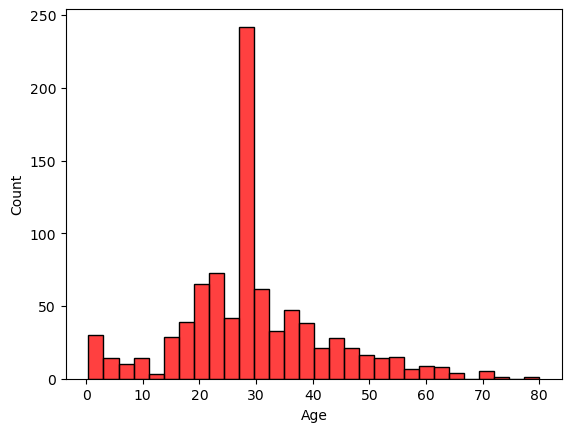

In [29]:
sns.histplot(df1['Age'], color='red')

<Axes: >

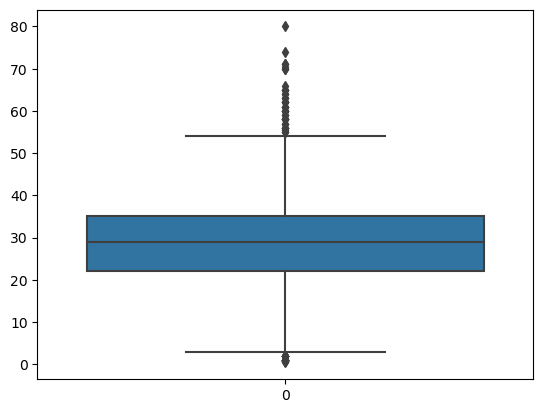

In [30]:
sns.boxplot(df1['Age'])

<Axes: xlabel='Pclass', ylabel='Age'>

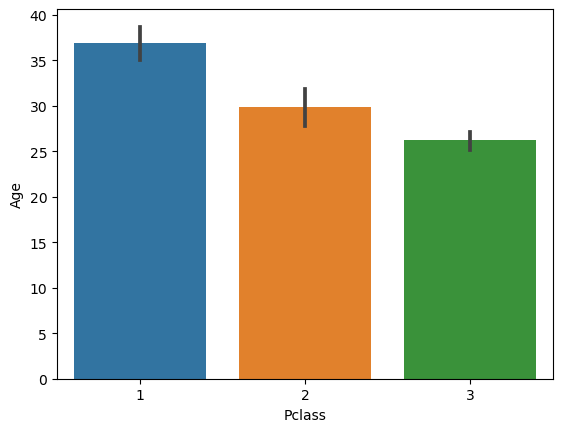

In [31]:
sns.barplot(x='Pclass',y='Age',data=df1)

<Axes: xlabel='Pclass', ylabel='Fare'>

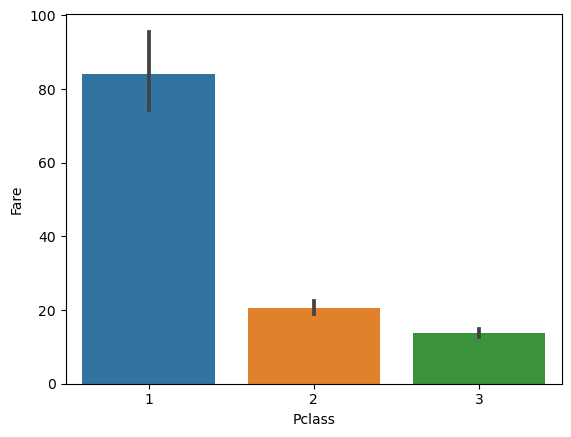

In [32]:
sns.barplot(x='Pclass',y='Fare',data=df1)

<Axes: xlabel='Fare', ylabel='Age'>

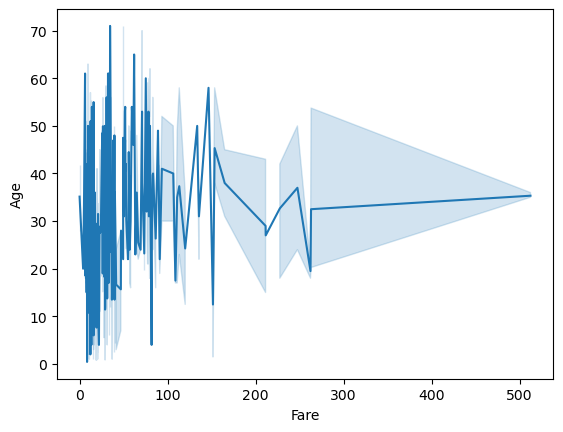

In [33]:
sns.lineplot(x=df['Fare'],y=df['Age'])

<Axes: >

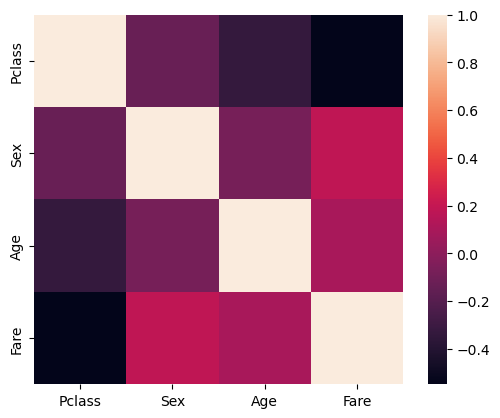

In [34]:
cm=df1.corr()
sns.heatmap(cm,square=True)

In [35]:
#ML...

In [36]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(df1,target,test_size=0.2)

In [37]:
len(X_train)

712

In [38]:
len(X_test)

179

In [39]:
len(y_train)

712

In [40]:
len(y_test)

179

In [41]:
from sklearn import svm
model=svm.SVC()
model

SVC()

In [42]:
model.fit(X_train,y_train)

SVC()

In [44]:
model.score(X_train,y_train)

0.6741573033707865

In [45]:
model.score(X_test,y_test)

0.6871508379888268

In [47]:
from sklearn.metrics import confusion_matrix


In [49]:
y_predict=model.predict(X_test)

In [50]:
y_predict

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [51]:
cm=confusion_matrix(y_test,y_predict,labels=model.classes_)

In [52]:
cm

array([[106,  12],
       [ 44,  17]], dtype=int64)

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.71      0.90      0.79       118
           1       0.59      0.28      0.38        61

    accuracy                           0.69       179
   macro avg       0.65      0.59      0.58       179
weighted avg       0.67      0.69      0.65       179



In [56]:
#kernal -linear,poly,RBF(for infinite dimensions)
#C- gives define decision boundary
from sklearn import svm
model=svm.SVC(kernel="linear",gamma='auto',C=2)


In [57]:
model.fit(X_train,y_train)

SVC(C=2, gamma='auto', kernel='linear')

In [59]:
y_predict=model.predict(X_test)

In [60]:
y_predict

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [61]:
model.score(X_test,y_test)

0.7486033519553073

In [62]:
model.score(X_train,y_train)

0.7963483146067416

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       118
           1       0.62      0.66      0.64        61

    accuracy                           0.75       179
   macro avg       0.72      0.73      0.72       179
weighted avg       0.75      0.75      0.75       179



In [64]:
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,1000],'kernel':['rbf']}

In [65]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(model,param_grid,refit=True,verbose=3)

In [66]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.601 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.608 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.606 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.606 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.606 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.601 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.608 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.606 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.606 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.606 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.692 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(C=2, gamma='auto', kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 1000],
                         'kernel': ['rbf']},
             verbose=3)

In [68]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [70]:
grid.best_estimator_

SVC(C=1000, gamma=0.001)

In [72]:
grid_predictions= grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))

[[92 26]
 [13 48]]


In [73]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83       118
           1       0.65      0.79      0.71        61

    accuracy                           0.78       179
   macro avg       0.76      0.78      0.77       179
weighted avg       0.80      0.78      0.79       179

